<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

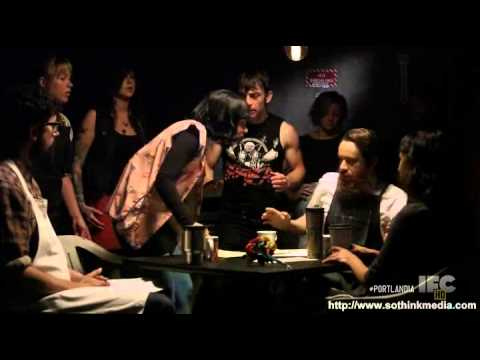

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/karthikmahendra/Desktop/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [32]:

#Imports

import spacy
import pandas as pd
import numpy as np
import re
from spacy.tokenizer import Tokenizer
from collections import Counter
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


**Data Wrangle**

In [4]:
shops['rating'] = shops['star_rating'].str.replace(' star rating','')

In [5]:
shops = shops.drop(['star_rating'],axis =1)

In [6]:
shops['date'] = shops['full_review_text'].apply(lambda x:x.split()[0])

In [7]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.replace(x.split()[0],''))

In [8]:
shops['check-ins'] = shops['full_review_text'].apply(lambda x: 0 if re.match("^[0-9]*$",x.split()[0]) is None else x.split()[0])

In [9]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x if re.match("^[0-9]*$",x.split()[0]) is None else " ".join(x.split()[2:]))

In [10]:
shops.sample(10)

,coffee_shop_name,full_review_text,rating,date,check-ins
6138,Epoch Coffee,ROTD 4/28/2014 This review isn't really fair. ...,5.0,12/20/2013,21
6222,Stinson’s,ROTD 11/15/2014 I work from home so I'm always...,5.0,3/31/2014,2
3864,Cream Whiskers,Cute cafe! I really like the interior design...,5.0,7/26/2016,0
3588,Cenote,Updated review Stopped by this place for bre...,3.0,6/13/2016,0
4033,Seventh Flag Coffee Co,Top place for coffee in 78704! Really great ...,5.0,5/31/2016,0
6637,Juan Pelota,Listed in High Five For Wi Fi(ve) Can I revi...,3.0,2/22/2010,0
555,Apanas Coffee & Beer,"Very cute and cozy cafe! When I was ordering, ...",4.0,3/20/2016,1
3969,Lola Savannah Coffee Lounge,Came here for the first time on a Saturday e...,5.0,4/7/2012,0
69,The Marvelous Vintage Tea Party Co.,Omg Sophia the owner is amazing. She is so p...,5.0,2/21/2014,0
7226,Russell’s Bakery,Best coconut cake in Austin and the chocolat...,5.0,12/13/2014,0


**Remove punctuation,CONVERT TO LOWER CASE and remove default stop words**

In [11]:
nlp = spacy.load("en_core_web_md")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [12]:
tokens =[]

for doc in tokenizer.pipe(shops['full_review_text'],batch_size = 1000):
    doc_tokens =[]
    for token in doc:
        if (token.is_stop == False)&(token.is_punct == False)&(token.is_space == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [13]:
shops.head()

,coffee_shop_name,full_review_text,rating,date,check-ins,tokens
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5.0,11/25/2016,1,"[love, love, loved, atmosphere!, corner, coffe..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0,12/2/2016,0,"[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4.0,11/30/2016,1,"[listed, brunch, spots, loved, eclectic, homey..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0,11/25/2016,0,"[cool, decor!, good, drinks, nice, seating, ho..."
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4.0,12/3/2016,1,"[located, northcross, mall, shopping, center, ..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

**Count function calculates word counts, its rank of appearence, culumlative sum and ratio of times a word appears in a doc**

In [14]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

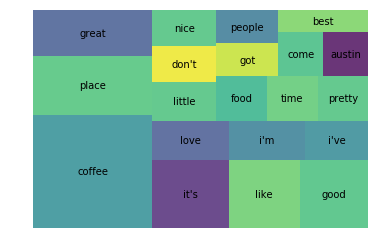

In [16]:
# graphical representation of top 20 most used words

wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [18]:
wc.head(50)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,coffee,4210,8058,1.0,0.020932,0.020932,0.552784
74,place,3029,4264,2.0,0.011076,0.032008,0.397715
103,great,2438,3250,3.0,0.008442,0.040450,0.320116
234,it's,2061,3117,4.0,0.008097,0.048547,0.270614
182,like,2034,2902,5.0,0.007538,0.056085,0.267069
169,good,2084,2779,6.0,0.007219,0.063304,0.273634
5,love,1434,1806,7.0,0.004691,0.067996,0.188288
349,i'm,1382,1797,8.0,0.004668,0.072664,0.181460
368,i've,1164,1479,9.0,0.003842,0.076505,0.152836
790,little,1230,1479,10.0,0.003842,0.080347,0.161502


In [86]:
# adding more stop words which is not providing much context

STOPWORDS = nlp.Defaults.stop_words.union(["it's", "coffee", "shop","i'm","i've","coffee,","you're","it.","i've","i'm","place"])

In [87]:
# Do tokanize and remove stop words and punctyation 

tokens =[]

for doc in tokenizer.pipe(shops['full_review_text'],batch_size = 1000):
    doc_tokens =[]
    for token in doc:
        if (token.text not in STOPWORDS)&(token.is_punct == False)&(token.is_space == False)&(token.is_stop == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

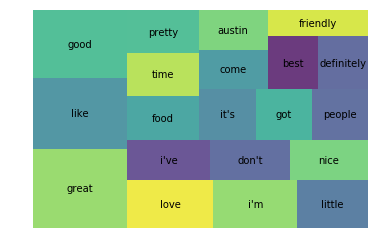

In [88]:
# top 20 most used words after stop count removal 

wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [89]:
wc['word'].nunique()

38796

In [90]:
shops['coffee_shop_name'].nunique()

79

In [91]:
shops['rating'] = shops['rating'].astype(float)

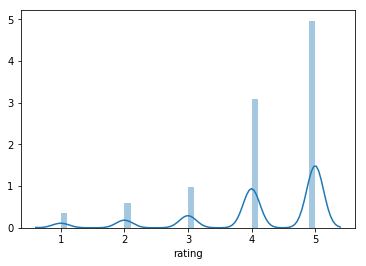

In [92]:
# Distribution of ratings 


sns.distplot(shops['rating'])

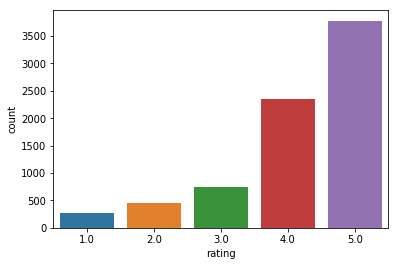

In [93]:
sns.countplot(x = 'rating',data=shops)

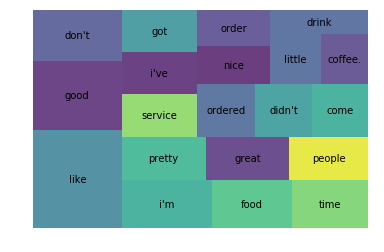

In [102]:
# Categorize all comments with rating 1,2 and 3 as bad

wc_bad = count(shops[shops['rating'] < 4]['tokens'])
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=0.8)
plt.axis('off')
plt.show()

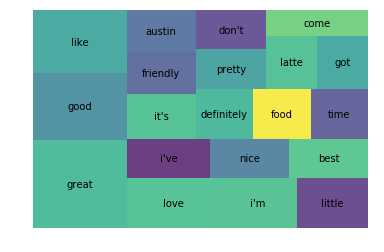

In [103]:
# Categorize all comments with rating 4 and 5 as good


wc_good = count(shops[shops['rating'] > 3]['tokens'])
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=0.8)
plt.axis('off')
plt.show()

In [104]:
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
98,great,2174,2902,1.0,0.010151,0.010151,0.354072
304,good,1643,2180,2.0,0.007626,0.017777,0.267590
235,like,1486,2068,3.0,0.007234,0.025011,0.242020
5,love,1263,1604,4.0,0.005611,0.030621,0.205700
317,i'm,1066,1358,5.0,0.004750,0.035372,0.173616


In [105]:
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
27,like,548,834,1.0,0.010158,0.010158,0.371274
12,good,441,599,2.0,0.007296,0.017453,0.298780
209,don't,340,430,3.0,0.005237,0.022690,0.230352
131,i'm,302,417,4.0,0.005079,0.027769,0.204607
62,food,266,369,5.0,0.004494,0.032264,0.180217


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [106]:
wc_good['appears_in_pct_good'] = wc_good['appears_in_pct']
wc_bad['appears_in_pct_bad'] = wc_bad['appears_in_pct']

In [108]:
# get the bad and good comment "pct_ratios" for each word

diff = wc_bad[['word','appears_in_pct_bad']].merge(wc_good[['word','appears_in_pct_good']],how = 'outer')

In [110]:
diff.head(10)

,word,appears_in_pct_bad,appears_in_pct_good
0,like,0.371274,0.242020
1,good,0.298780,0.267590
2,don't,0.230352,0.129153
3,i'm,0.204607,0.173616
4,food,0.180217,0.134528
5,time,0.178862,0.135993
6,pretty,0.188347,0.128339
7,great,0.178862,0.354072
8,people,0.167344,0.125081
9,service,0.176829,0.093974


In [112]:
# Top 20 greatest differences 

diff['diff'] = diff['appears_in_pct_good'] - diff['appears_in_pct_bad']
diff.sort_values(by='diff').head(20)

,word,appears_in_pct_bad,appears_in_pct_good,diff
0,like,0.371274,0.242020,-0.129254
2,don't,0.230352,0.129153,-0.101199
9,service,0.176829,0.093974,-0.082855
13,didn't,0.150407,0.068893,-0.081514
26,asked,0.098916,0.018893,-0.080023
12,ordered,0.162602,0.083062,-0.079540
21,wasn't,0.113144,0.041857,-0.071287
42,maybe,0.099593,0.028502,-0.071092
6,pretty,0.188347,0.128339,-0.060008
28,better,0.110434,0.053094,-0.057339


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

